### Objective of this Task: Visualize total sales by region sorted high to low

In [33]:
import pandas as pd
wholesale = pd.read_csv('wholesale-customers.csv')
wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [34]:
wholesale.columns = wholesale.columns.str.lower()
wholesale.columns

Index(['channel', 'region', 'fresh', 'milk', 'grocery', 'frozen',
       'detergents_paper', 'delicassen'],
      dtype='object')

In [21]:
wholesale['region'].unique()

array([3, 1, 2], dtype=int64)

### Method 1 - groupby + sum()

In [22]:
wholesale.drop(columns = 'channel',inplace=True)
wholesale


,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


In [24]:
wholesale_by_region = wholesale.groupby(['region']).sum()
wholesale_by_region['total_sales'] = wholesale_by_region.sum(axis=1)

In [25]:
wholesale_by_region

,fresh,milk,grocery,frozen,detergents_paper,delicassen,total_sales
region,,,,,,,
1,854833,422454,570037,231026,204136,104327,2386813
2,464721,239144,433274,190132,173311,54506,1555088
3,3960577,1888759,2495251,930492,890410,512110,10677599


<Axes: title={'center': 'Total Sales by Region'}, ylabel='region'>

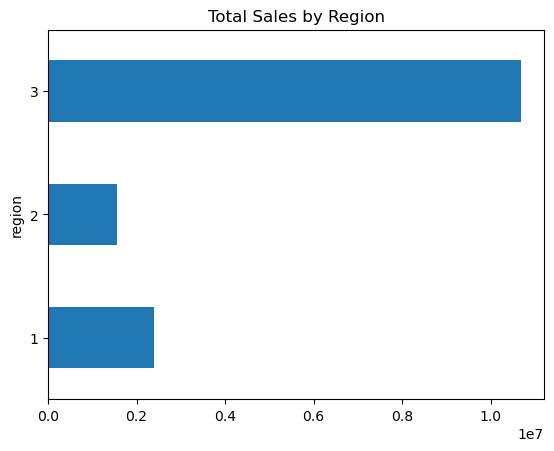

In [27]:
wholesale_by_region['total_sales'].plot(kind='barh', title='Total Sales by Region')

### Method 2 - pivot + groupby()

In [35]:
wholesale_pivot = pd.melt(frame=wholesale, id_vars=['region'], value_vars=wholesale.drop(columns = ['channel','region'])
                                , value_name='sales', var_name='department')

In [36]:
wholesale_pivot

,region,department,sales
0,3,fresh,12669
1,3,fresh,7057
2,3,fresh,6353
3,3,fresh,13265
4,3,fresh,22615
...,...,...,...
2635,3,delicassen,2204
2636,3,delicassen,2346
2637,3,delicassen,1867
2638,3,delicassen,2125


In [37]:
wholesale_by_region = wholesale_pivot.groupby('region')
wholesale_by_region['sales'].sum()

region
1     2386813
2     1555088
3    10677599
Name: sales, dtype: int64

<Axes: title={'center': 'Total Sales by Region'}, ylabel='region'>

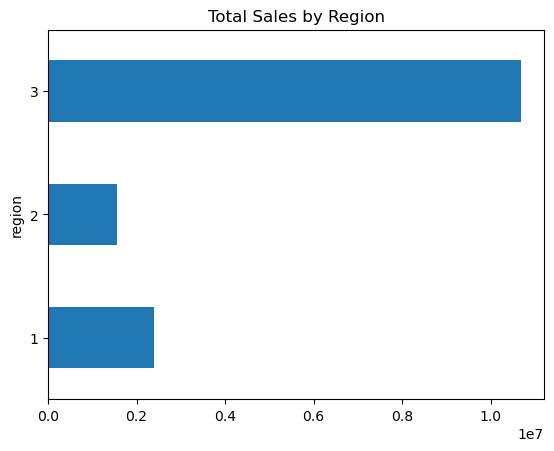

In [38]:
wholesale_by_region['sales'].sum().plot(kind='barh', title='Total Sales by Region')